In [4]:
#Importing required libraries
import pandas as pd
import numpy as np
from pathlib import Path
from collections import Counter
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# PreProcessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import MinMaxScaler

# Splitting Data
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [5]:
# Load the dataset
df = pd.read_csv(Path('Mental_Health_Data.csv'))
df.head(10)

,ID,AGE,GENDER,COUNTRY_WORKING_IN,WFH,MENTAL_HEALTH_COVERAGE,TECH_COMPANY,MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE,EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT,PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS,AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS,PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER,CURRENT_MENTAL_HEALTH_DISORDER
0,0,39,Male,United Kingdom,Sometimes,Not eligible for coverage,1.0,NaN,No,NaN,"No, none did",N/A (not currently aware),None did,Maybe,No
1,1,29,male,United States of America,Never,No,1.0,Yes,Yes,NaN,"Yes, they all did",I was aware of some,Some did,"No, I don't think it would",Yes
2,2,38,Male,United Kingdom,Always,No,1.0,NaN,No,NaN,"No, none did",N/A (not currently aware),Some did,Maybe,No
3,3,43,male,United Kingdom,Sometimes,NaN,NaN,NaN,NaN,1.0,Some did,N/A (not currently aware),None did,"Yes, I think it would",Yes
4,4,43,Female,United States of America,Sometimes,Yes,0.0,Yes,No,NaN,I don't know,N/A (not currently aware),None did,"Yes, I think it would",Yes
5,5,42,Male,United Kingdom,Sometimes,Yes,1.0,I am not sure,Yes,NaN,"No, none did","Yes, I was aware of all of them",None did,"Yes, I think it would",Yes
6,6,30,M,United States of America,Sometimes,I don't know,1.0,No,No,NaN,Some did,I was aware of some,Some did,"Yes, I think it would",No
7,7,37,female,United States of America,Always,Yes,1.0,Yes,Yes,NaN,Some did,I was aware of some,Some did,Maybe,Yes
8,8,44,Female,United States of America,Sometimes,I don't know,0.0,No,No,NaN,I don't know,N/A (not currently aware),None did,Maybe,Yes
9,9,30,Male,United States of America,Always,NaN,NaN,NaN,NaN,1.0,Some did,I was aware of some,None did,Maybe,Yes


In [6]:
df.columns

Index(['ID', 'AGE', 'GENDER', 'COUNTRY_WORKING_IN', 'WFH',
       'MENTAL_HEALTH_COVERAGE', 'TECH_COMPANY',
       'MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE',
       'EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES',
       'MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT',
       'PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS',
       'AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS',
       'PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES',
       'MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER',
       'CURRENT_MENTAL_HEALTH_DISORDER'],
      dtype='object')

In [7]:
df.shape

(1433, 15)

In [8]:
df.info

<bound method DataFrame.info of         ID  AGE      GENDER        COUNTRY_WORKING_IN        WFH  \
0        0   39        Male            United Kingdom  Sometimes   
1        1   29        male  United States of America      Never   
2        2   38       Male             United Kingdom     Always   
3        3   43        male            United Kingdom  Sometimes   
4        4   43      Female  United States of America  Sometimes   
...    ...  ...         ...                       ...        ...   
1428  1428   34     Female   United States of America  Sometimes   
1429  1429   56        MALE               Afghanistan  Sometimes   
1430  1430   52        Male  United States of America  Sometimes   
1431  1431   30      Female  United States of America  Sometimes   
1432  1432   25  non-binary                    Canada  Sometimes   

          MENTAL_HEALTH_COVERAGE  TECH_COMPANY  \
0     Not eligible for coverage            1.0   
1                             No           1.0   
2

In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
percent_missing

ID                                                        0.000000
AGE                                                       0.000000
GENDER                                                    0.209351
COUNTRY_WORKING_IN                                        0.000000
WFH                                                       0.000000
MENTAL_HEALTH_COVERAGE                                   20.027913
TECH_COMPANY                                             20.027913
MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE                     29.309142
EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES                   20.027913
MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT       79.972087
PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS            11.793440
AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS    11.793440
PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES              11.793440
MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER                   0.000000
CURRENT_MENTAL_HEALTH_DISORDER                            0.00

In [10]:
df_eda = df.copy()

In [11]:
df_eda.drop(columns=['MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT'], inplace = True)

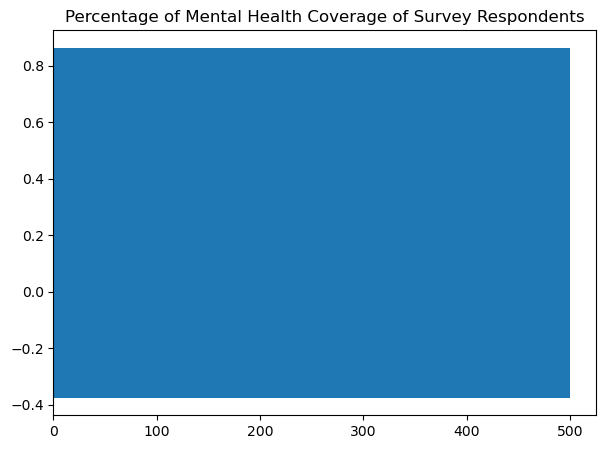

In [28]:
# Plot mental health coverage percentage
plt.figure(figsize = (7,5))
eda_percentage = df_eda['MENTAL_HEALTH_COVERAGE'].value_counts(normalize = True).rename_axis('MENTAL_HEALTH_COVERAGE').reset_index(name = 'Percentage')
plt.barh( 
         y = 'Percentage', 
         width = 500,
         data = eda_percentage)
plt.title('Percentage of Mental Health Coverage of Survey Respondents')
plt.show()

# (x = 'MENTAL_HEALTH_COVERAGE',  y = 'Percentage', width = 500, data = eda_percentage)x = 'MENTAL_HEALTH_COVERAGE',)
    

In [17]:
df_eda['GENDER'] = df['GENDER'].fillna(unknown)

NameError: name 'unknown' is not defined

In [ ]:
GENDER',
       'MENTAL_HEALTH_COVERAGE', 'TECH_COMPANY',
       'MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE',
       'EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES',
       'MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT',
       'PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS',
       'AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS',
       'PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES'